<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0622_32%EC%9D%BC%EC%B0%A8_AI(%EB%94%A5%EB%9F%AC%EB%8B%9D)%5B%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%84%B8%ED%8C%85%EB%B0%A9%EB%B2%95%2C_MNIST%EC%98%88%EC%B8%A1%26%EA%B7%B8%EB%9E%98%ED%94%84%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터셋 생성

원본 데이터를 불러오거나 시뮬레이션을 통해 데이터 생성

데이터로부터 훈련 셋, 검증 셋, 시험 셋을 생성

이때 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환

2. 모델 구성

시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성

좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용

3. 모델 학습과정 설정

학습하기 전에 학습에 대한 설정을 수행함

손실 함수 및 최적화 방법을 정의

케라스에서는 compile()함수를 사용

4. 모델 학습

훈련셋을 이용해 구성한 모델 학습

케라스에서는 fit()함수 사용함

5. 학습과정 살펴보기

모델 학습시, 훈련셋, 검증셋의 손실 및 정확도를 측정

반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단

6. 모델 평가

준비된 시험셋으로 학습한 모델 평가

케라스에서는 evaluate()함수 사용

7. 모델 사용

임의의 입력으로 모델 출력 사용
predict()함수 사용


In [ ]:
def build_model(n,activation_, optimizer_):
    model = models.Sequential()
    model.add(layers.Dense(n, activation = activation_, input_shape = (28*28,)))
    model.add(layers.Dense(10, activation = 'softmax'))
    
    model.compile(optimizer = optimizer_, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

#1 . 데이터 셋 생성
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


# 2. 모델 구성
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28 , activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'] )


#4. 모델 학습
#hist = model.fit(x_train, y_train, epochs = 5, batch_size = 32, validation_data = (x_val, y_val))
hist = model.fit(x_train, y_train, epochs = 5, batch_size = 32)

# 5. 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)

print('## evaluation loss and_metrics ##')
print(loss_and_metrics)


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6905 - accuracy: 0.8229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3451 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.9162
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2704 - accuracy: 0.9232
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2348 - accuracy: 0.9330
## evaluation loss and_metrics ##
[0.23478733003139496, 0.9330000281333923]


dict_keys(['loss', 'accuracy'])


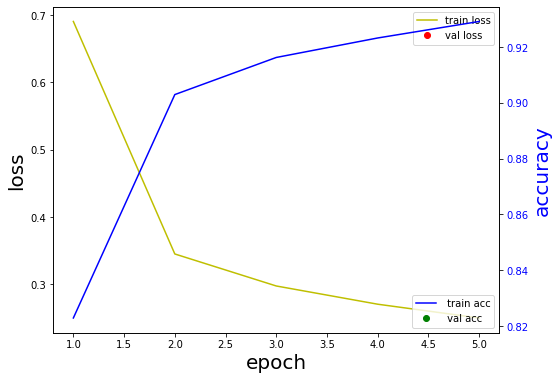

In [ ]:
# 6. 
from drive.MyDrive import history_plot as hp
hp.history_plot(hist)

In [ ]:
# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')

print(yhat)

## yhat ##
[[1.12552676e-04 9.37190947e-08 4.58241295e-04 3.71103967e-03
  1.78856476e-06 8.03646981e-05 7.08532113e-08 9.95264292e-01
  2.99887088e-05 3.41473904e-04]]


**validation, dot-graph**

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

#1 . 데이터 셋 생성
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 2. 모델 구성
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28 , activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'] )


#4. 모델 학습
hist = model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_data = (x_val, y_val))
#hist = model.fit(x_train, y_train, epochs = 5, batch_size = 32)

# 5. 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)

print('## evaluation loss and_metrics ##')
print(loss_and_metrics)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


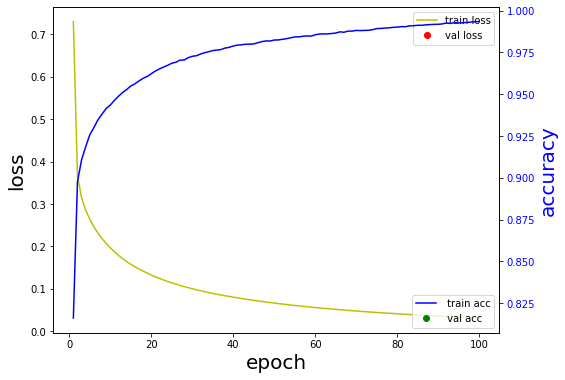

In [ ]:
from drive.MyDrive import history_plot as hp
hp.history_plot(hist)

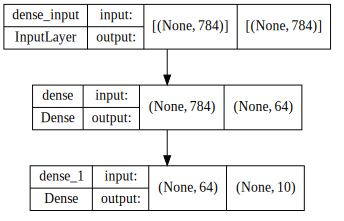

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

#1 . 데이터 셋 생성
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#validation set준비하기
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#train_set 고르기
train_rand_idxs= np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 2. 모델 구성
model = Sequential()
model.add(Dense(units=2, input_dim = 28*28 , activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'] )


#4. 모델 학습
hist = model.fit(x_train, y_train, epochs = 3000, batch_size = 32, validation_data = (x_val, y_val))
#hist = model.fit(x_train, y_train, epochs = 5, batch_size = 32)

# 5. 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)

print('## evaluation loss and_metrics ##')
print(loss_and_metrics)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
22/22 [==============================] - 0s 4ms/step - loss: 0.9753 - accuracy: 0.6557 - val_loss: 1.5329 - val_accuracy: 0.4867
Epoch 503/3000
22/22 [==============================] - 0s 3ms/step - loss: 0.9738 - accuracy: 0.6543 - val_loss: 1.5307 - val_accuracy: 0.4800
Epoch 504/3000
22/22 [==============================] - 0s 4ms/step - loss: 0.9748 - accuracy: 0.6543 - val_loss: 1.5331 - val_accuracy: 0.4800
Epoch 505/3000
22/22 [==============================] - 0s 3ms/step - loss: 0.9755 - accuracy: 0.6514 - val_loss: 1.5332 - val_accuracy: 0.4833
Epoch 506/3000
22/22 [==============================] - 0s 3ms/step - loss: 0.9711 - accuracy: 0.6557 - val_loss: 1.5406 - val_accuracy: 0.4867
Epoch 507/3000
22/22 [==============================] - 0s 3ms/step - loss: 0.9718 - accuracy: 0.6529 - val_loss: 1.5373 - val_accuracy: 0.4800
Epoch 508/3000
22/22 [==============================] - 0s 3ms/step - loss: 0.9722 - accuracy: 0.6529 - val_loss: 1

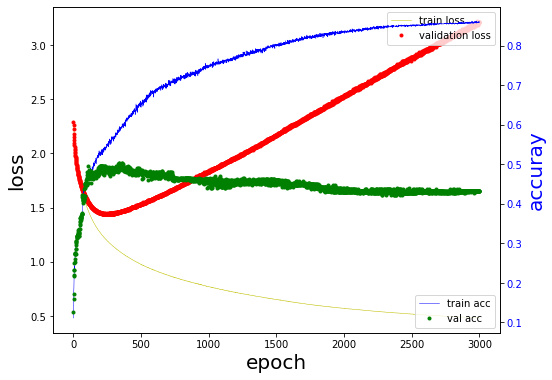

In [ ]:
import history_plot as hp
hp.history_plot(hist)

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

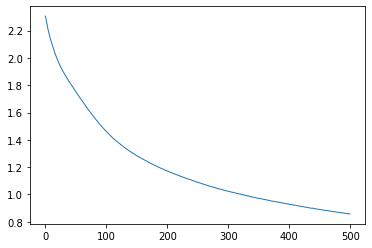

In [ ]:
import matplotlib.pyplot as plt
hist_dict = hist.history
plt.plot(hist_dict['loss'], linewidth =1.0)

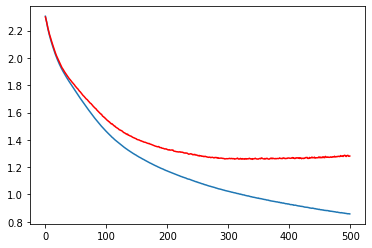

In [ ]:
import matplotlib.pyplot as plt
hist_dict = hist.history
plt.plot(hist_dict['loss'])
plt.plot(hist_dict['val_loss'], 'r')

plt.show()


In [ ]:
plt.plot(hist_dict['loss'])
plt.plot(hist_dict['val_loss'], 'r')
plt.show()

    keras.callbacks.EarlyStopping(monitor ='val_loss', min_delta = 0, patience = 0, verbose=0, mode='auto')

콜백, 콜백 함수

    다른 함수의 인자로써 이용되는 함수
    어떤 이벤트에 의해 호출되어지는 함수

    monitor : 관찰하고자 하는 항목. 'val_loss' 나 'val_acc'가 주로 사용됨

    min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냄. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단

    patience: 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인가를 지정함. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속

    verbose: 얼마나 자세하게 정보를 표시할 것인가 지정(0,1,2)

    mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준 지정. 예를 들어 관찰 항목이 'val_loss'인 경우에는 감소되는 것이 멈출

    auto : 

In [ ]:
def hap(f, fx):
    return a+b

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

#1 . 데이터 셋 생성
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')/255.0
x_test = x_test.reshape(10000, 784).astype('float32')/255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#validation set준비하기
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#train_set 고르기
train_rand_idxs= np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 2. 모델 구성
model = Sequential()
model.add(Dense(units=2, input_dim = 28*28 , activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics=['accuracy'] )


#4. 모델 학습
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)
#early_stopping = EarlyStopping()
hist = model.fit(x_train, y_train, epochs = 3000, batch_size = 32, validation_data = (x_val, y_val), callbacks=[early_stopping])
#hist = model.fit(x_train, y_train, epochs = 5, batch_size = 32)

# 5. 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)

print('## evaluation loss and_metrics ##')
print(loss_and_metrics)


Epoch 1/3000
22/22 [==============================] - 0s 9ms/step - loss: 2.3110 - accuracy: 0.0571 - val_loss: 2.3001 - val_accuracy: 0.0733
Epoch 2/3000
22/22 [==============================] - 0s 3ms/step - loss: 2.2900 - accuracy: 0.0871 - val_loss: 2.2755 - val_accuracy: 0.1233
Epoch 3/3000
22/22 [==============================] - 0s 4ms/step - loss: 2.2533 - accuracy: 0.1386 - val_loss: 2.2564 - val_accuracy: 0.1367
Epoch 4/3000
22/22 [==============================] - 0s 3ms/step - loss: 2.2311 - accuracy: 0.1571 - val_loss: 2.2418 - val_accuracy: 0.1567
Epoch 5/3000
22/22 [==============================] - 0s 3ms/step - loss: 2.2148 - accuracy: 0.1729 - val_loss: 2.2307 - val_accuracy: 0.1633
Epoch 6/3000
22/22 [==============================] - 0s 3ms/step - loss: 2.2013 - accuracy: 0.1871 - val_loss: 2.2219 - val_accuracy: 0.1700
Epoch 7/3000
22/22 [==============================] - 0s 3ms/step - loss: 2.1895 - accuracy: 0.1886 - val_loss: 2.2136 - val_accuracy: 0.1767
Epoch 

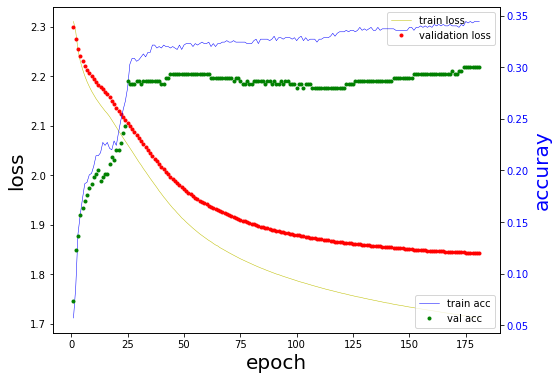

In [ ]:
hp.history_plot(hist)